In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# ------------------------
# 1. Load the Boston Housing dataset
# ------------------------
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Features & target
X = df.drop("medv", axis=1).values   # shape (506, 13)
y = df["medv"].values                # shape (506,)

print("Dataset shape:", X.shape, y.shape)
print(df.head())


Dataset shape: (506, 13) (506,)
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [3]:
# ------------------------
# 2. Train-test split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
# ------------------------
# 3. Feature scaling
# ------------------------
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Scaling y (optional, helps gradient descent)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

In [18]:
# ------------------------
# 4. Initialize parameters
# ------------------------
n_features = X_train.shape[1]
w = np.random.rand(n_features)  # weights
b = 0                           # bias

learning_rate = 0.01
epochs = 5001

In [19]:
# ------------------------
# 5. Gradient descent loop
# ------------------------
for epoch in range(epochs):
    # Predictions
    y_pred_scaled = X_train.dot(w) + b
    
    # Error
    error = y_pred_scaled - y_train_scaled
    
    # Gradients
    dw = (1 / len(X_train)) * X_train.T.dot(error)
    db = (1 / len(X_train)) * np.sum(error)
    
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        mse_train = np.mean(error ** 2)
        print(f"Epoch {epoch}: MSE (scaled) = {mse_train:.4f}")

Epoch 0: MSE (scaled) = 12.3225
Epoch 1000: MSE (scaled) = 0.2687
Epoch 2000: MSE (scaled) = 0.2526
Epoch 3000: MSE (scaled) = 0.2501
Epoch 4000: MSE (scaled) = 0.2494
Epoch 5000: MSE (scaled) = 0.2492


In [20]:
# ------------------------
# 6. Evaluate on test data
# ------------------------
y_pred_scaled_test = X_test.dot(w) + b
y_pred_test = scaler_y.inverse_transform(y_pred_scaled_test.reshape(-1, 1)).flatten()

test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
r2 = r2_score(y_test, y_pred_test)

print("\n--- Evaluation on Test Set ---")
print(f"MSE:  {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R²:   {r2:.3f}")


--- Evaluation on Test Set ---
MSE:  24.42
RMSE: 4.94
R²:   0.667


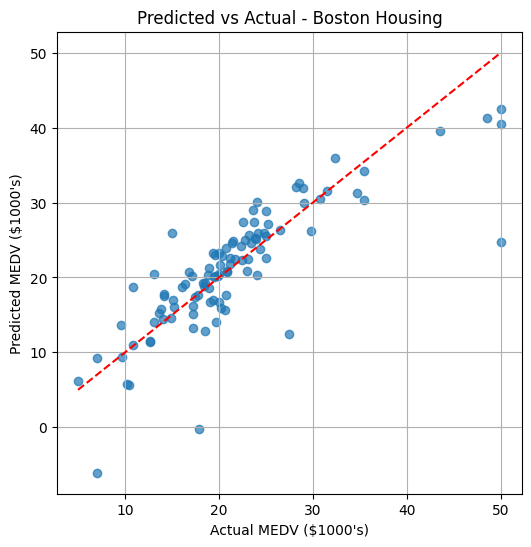

In [21]:
# ------------------------
# 7. Plot predictions vs actual
# ------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual MEDV ($1000's)")
plt.ylabel("Predicted MEDV ($1000's)")
plt.title("Predicted vs Actual - Boston Housing")
plt.grid(True)
plt.show()

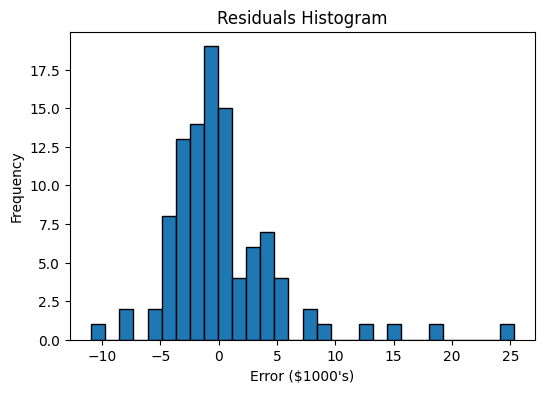

In [22]:
# ------------------------
# 8. Plot residuals
# ------------------------
residuals = y_test - y_pred_test
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Residuals Histogram")
plt.xlabel("Error ($1000's)")
plt.ylabel("Frequency")
plt.show()